<h1><i><strong>1. Importing Libraries</strong></i></h1>
<h4>This cell imports the necessary libraries and modules for the project. It includes:</h4>
<ul>
    <li><strong><code>RandomForestClassifier</code></strong> for training the Random Forest model.</li>
    <li><strong><code>GridSearchCV</code></strong> for performing hyperparameter tuning via grid search.</li>
    <li><strong><code>roc_curve</code></strong> and <strong><code>auc</code></strong> for calculating ROC curves and AUC scores.</li>
    <li><strong><code>matplotlib.pyplot</code></strong> for plotting graphs and visualizations.</li>
    <li><strong><code>keras.api.layers.Flatten</code></strong> for flattening input data to 1D arrays for the Random Forest model.</li>
    <li><strong><code>keras.api.utils.to_categorical</code></strong> for one-hot encoding of labels.</li>
    <li><strong><code>numpy</code></strong> for numerical operations and <strong><code>pandas</code></strong> for data handling.</li>
    <li><strong><code>sys.path.append</code></strong> adds the path for importing custom modules like <strong><code>DataLoader</code></strong> and <strong><code>LABELS</code></strong>.</li>
</ul>

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from keras.api.layers import Flatten
from keras.api.utils import to_categorical
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

Libraries Loaded Successfully


<h1><i><strong>2. Dataset and Hyperparameter Initialization</strong></i></h1>
<h4>This cell defines the paths to datasets and sets important configuration values for the model:</h4>
<ul>
    <li><strong><code>DATASET1</code></strong>, <strong><code>DATASET2</code></strong>, <strong><code>DATASET3</code></strong>: Paths to different datasets used for training and testing.</li>
    <li><strong><code>REAL_DATA</code></strong>: Path to real-world test data.</li>
    <li><strong><code>IMAGE_SIZE</code></strong>: Image size for resizing images from the datasets.</li>
    <li><strong><code>SHRINK</code></strong>: A factor used for image processing.</li>
    <li><strong><code>INPUT_SHAPE</code></strong>: Input shape for the model, specifically for image dimensions.</li>
    <li><strong><code>CLASSES</code></strong>: Number of output classes (43, corresponding to Persian alphabet letters).</li>
    <li><strong><code>THRESHOLD</code></strong>: A threshold value for custom logic in the code (not further specified).</li>
    <li><strong><code>EPOCHS</code></strong>: Number of epochs for model training.</li>
</ul>

In [2]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
DATASET3 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-3"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20

<h1><i><strong>3. Loading Data and Visualizing Samples</strong></i></h1>
<h4>This cell loads the training and testing data, reshapes it, and visualizes a subset of the dataset:</h4>
<ul>
    <li><strong><code>dataloader.load_data()</code></strong>: Loads the dataset and returns training and test data.</li>
    <li><strong><code>X_train</code></strong>, <strong><code>y_train</code></strong>, <strong><code>X_test</code></strong>, <strong><code>y_test</code></strong>: The data arrays for training and testing sets.</li>
    <li><strong><code>Flatten()</code></strong>: Flattens the 2D image data to 1D for model input.</li>
    <li><strong><code>plt.subplot</code></strong>: Displays a set of images from the training data, showing a few samples from each class.</li>
</ul>

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


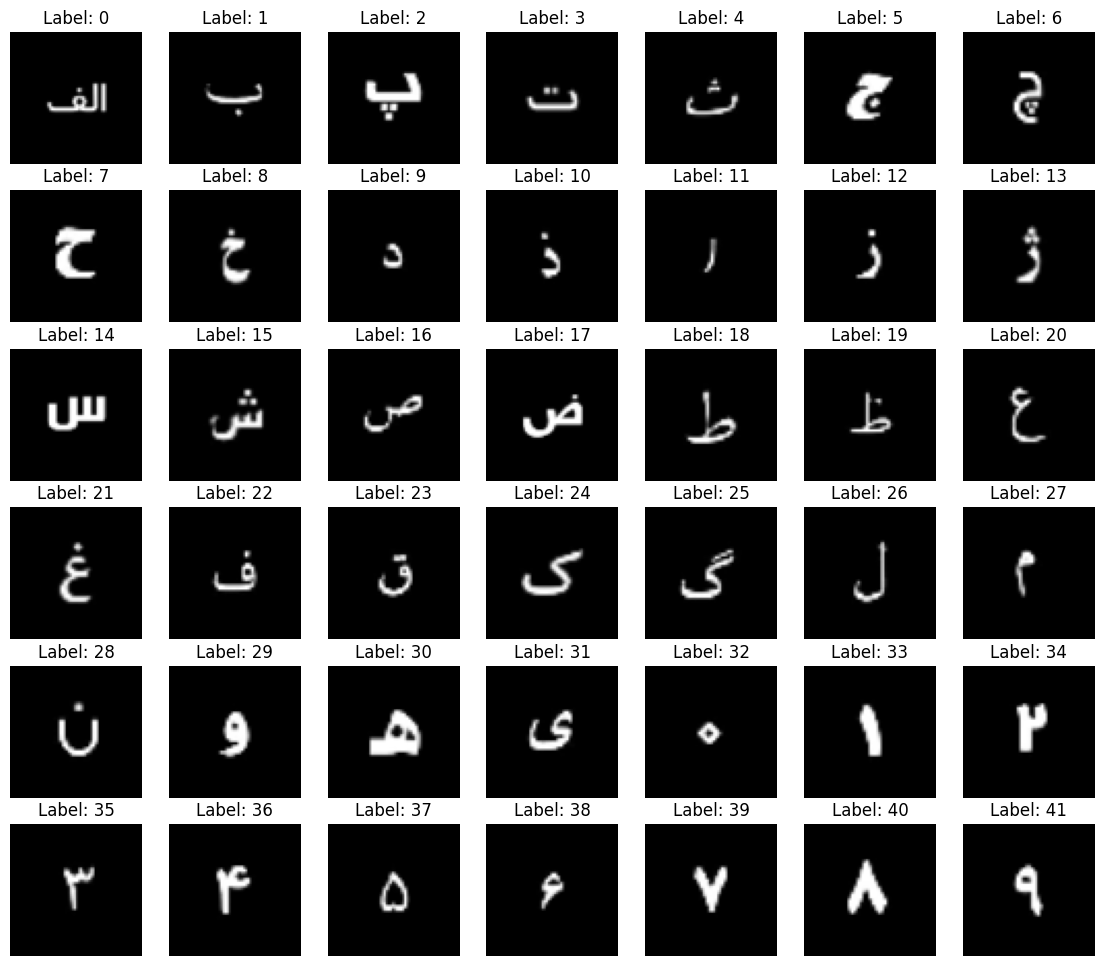

In [3]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, contrast=None, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

X_train_1d = np.array(Flatten()(X_train))
X_test_1d = np.array(Flatten()(X_test))

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

<h1><i><strong>4. Hyperparameter Tuning with Grid Search</strong></i></h1>
<h4>This cell performs hyperparameter tuning using <strong><code>GridSearchCV</code></strong>:</h4>
<ul>
    <li><strong><code>rfc_grid_search.fit()</code></strong>: Trains the Random Forest model with different combinations of hyperparameters.</li>
    <li><strong><code>rfc_params</code></strong>: Defines the hyperparameter grid for tuning, including <strong><code>criterion</code></strong>, <strong><code>n_estimators</code></strong>, <strong><code>max_features</code></strong>, and <strong><code>max_depth</code></strong>.</li>
    <li><strong><code>best_params_</code></strong> and <strong><code>best_score_</code></strong>: Output the best hyperparameters and the best validation score from the grid search.</li>
</ul>

In [4]:
rfc = RandomForestClassifier()

rfc_params = {'criterion' : ["gini", "entropy", "log_loss"],
             'n_estimators' : [50, 100],
             'max_features' : ["sqrt", "log2"],
             'max_depth' : ['None', 5, 10]}

rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_params, verbose=2)

rfc_grid_search.fit(X_train_1d, y_train)

print(f">> Best Params : {rfc_grid_search.best_params_}")
print(f">> Best Score : {rfc_grid_search.best_score_}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=None, max_features=sqrt, n_estimato

<h1><i><strong>5. Training the Best Model</strong></i></h1>
<h4>This cell trains the Random Forest model using the best hyperparameters found during grid search:</h4>
<ul>
    <li><strong><code>best_forest.fit()</code></strong>: Trains the Random Forest model using the best-found parameters.</li>
</ul>

In [5]:
best_forest = rfc_grid_search.best_estimator_
best_forest.fit(X_train_1d, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

<h1><i><strong>6. Evaluating the Model and Plotting ROC Curves</strong></i></h1>
<h4>This cell evaluates the model’s performance and plots the ROC curves for each class:</h4>
<ul>
    <li><strong><code>best_forest.score()</code></strong>: Calculates the model's accuracy on the test set.</li>
    <li><strong><code>predictions</code></strong>: Predicts class probabilities for the test data.</li>
    <li><strong><code>roc_curve</code></strong> and <strong><code>auc</code></strong>: Used to calculate the FPR, TPR, and AUC for each class.</li>
    <li><strong><code>plt.subplot</code></strong>: Displays the ROC curves for all classes in a grid layout.</li>
</ul>

Validation Accuracy : 0.9209302325581395


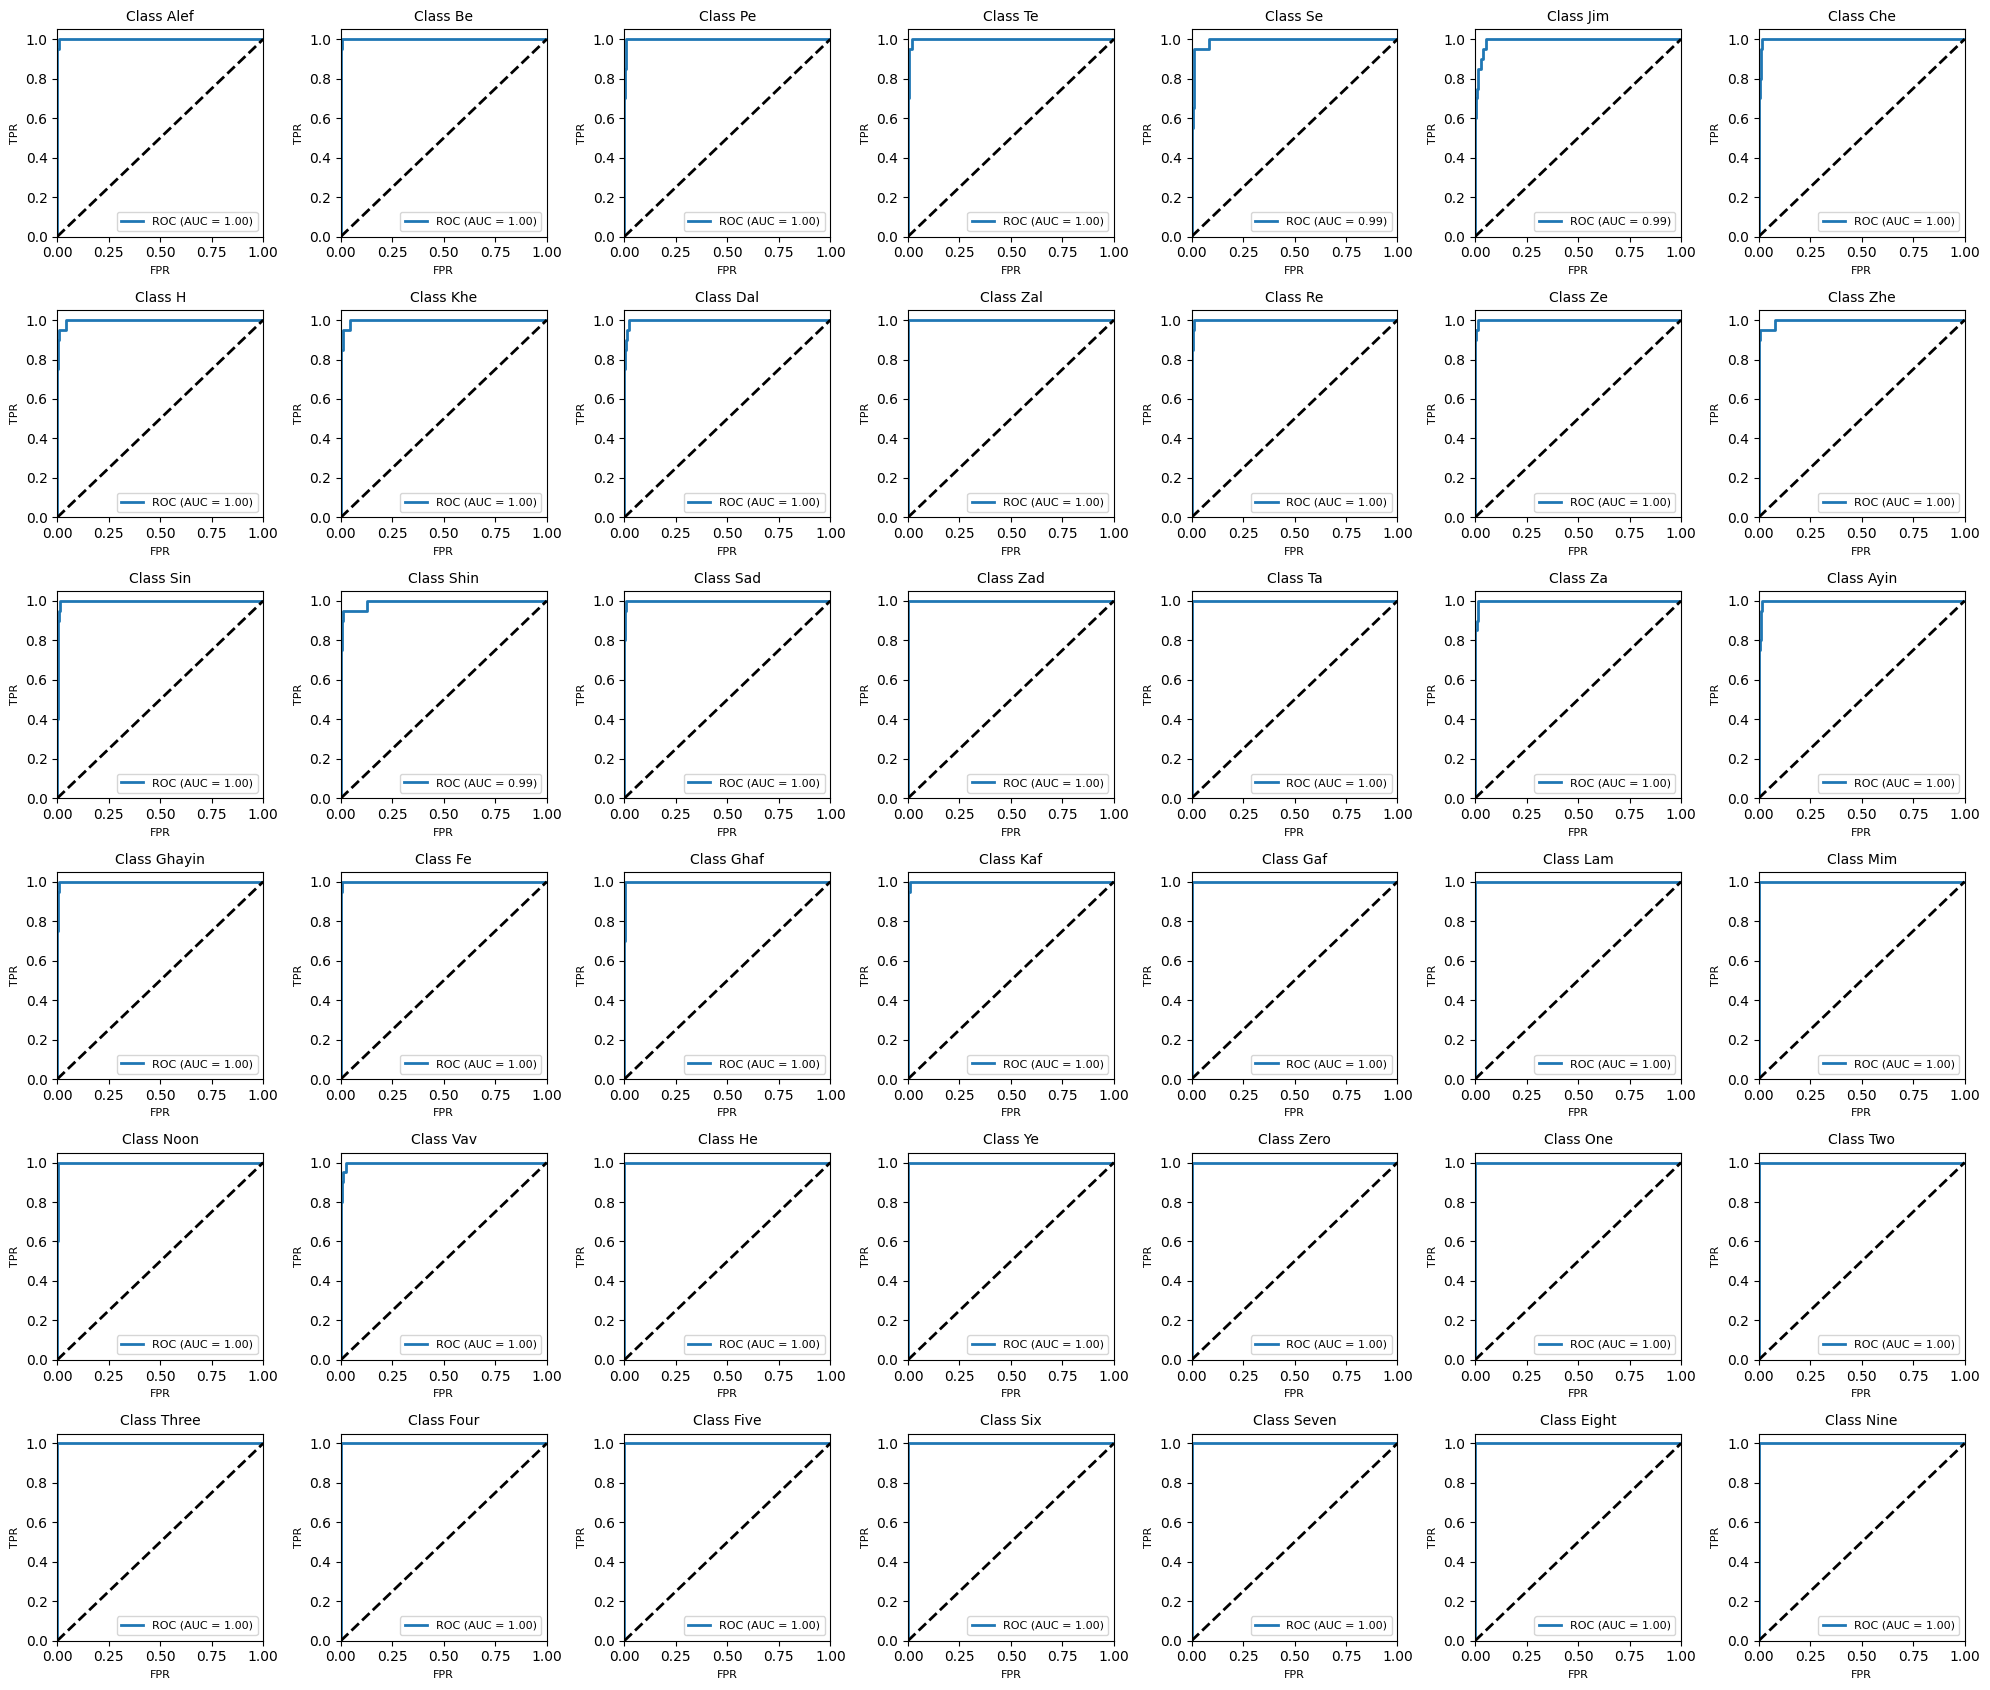

In [6]:
print(f"Validation Accuracy : {best_forest.score(X_test_1d, y_test)}")

predictions = best_forest.predict_proba(X_test_1d)

y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 6  
n_cols = 7  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 17))

axes = axes.flatten()

for i in range(CLASSES-1):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<h1><i><strong>7. Real Data Prediction and Visualization</strong></i></h1>
<h4>This cell uses the trained model to predict classes for real-world data and visualizes the results:</h4>
<ul>
    <li><strong><code>cv.imread()</code></strong>: Loads images from the real data folder.</li>
    <li><strong><code>dataloader.centerize()</code></strong> and <strong><code>normalize()</code></strong>: Preprocesses the images before prediction.</li>
    <li><strong><code>best_forest.predict_proba()</code></strong>: Predicts the class probabilities for each real-world image.</li>
    <li><strong><code>plt.subplot</code></strong>: Displays each real-world image along with the predicted class label.</li>
</ul>

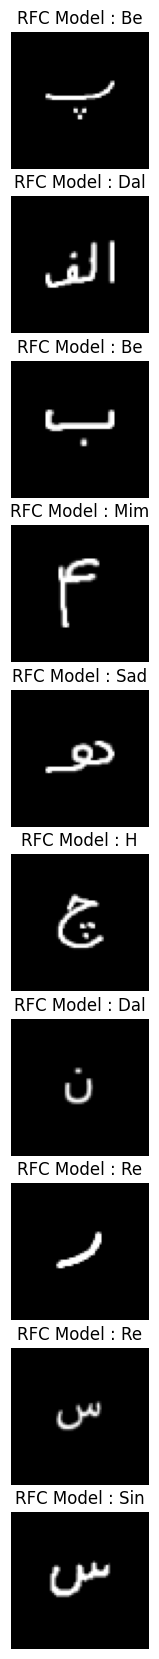

In [9]:
import os
import cv2 as cv

rows = len(os.listdir(REAL_DATA))

plt.figure(figsize=(4, 21))

for i,img_name in enumerate(os.listdir(REAL_DATA)):
    
    image_path = os.path.join(REAL_DATA, img_name)

    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    image = dataloader.centerize(image)
    image = dataloader.normalize(image)

    predictions_test = best_forest.predict_proba(image.reshape(1,INPUT_SHAPE[0]*INPUT_SHAPE[1]))


    plt.subplot(rows, 2, 2*i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'RFC Model : {LABELS[np.argmax(predictions_test)]}')
    plt.axis('off')

plt.show()